loss 0.233, train acc 0.913, test acc 0.898
3283.1 examples/sec on cuda:0


'## Summary\n\n* VGG-11 constructs a network using reusable convolutional blocks. Different VGG models can be defined by the differences in the number of convolutional layers and output channels in each block.\n* The use of blocks leads to very compact representations of the network definition. It allows for efficient design of complex networks.\n* In their VGG paper, Simonyan and Ziserman experimented with various architectures. In particular, they found that several layers of deep and narrow convolutions (i.e., $3 \times 3$) were more effective than fewer layers of wider convolutions.\n\n## Exercises\n\n1. When printing out the dimensions of the layers we only saw 8 results rather than 11. Where did the remaining 3 layer information go?\n1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory. Analyze the reasons for this.\n1. Try changing the height and width of the images in Fashion-MNIST from 224 to 96. What influence does this have 

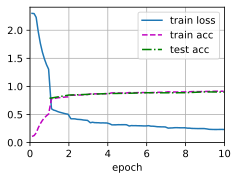

In [1]:

#!pip install d2l==0.14.4 # Run if d2l is not already installed

from d2l import torch as d2l
import torch
from torch import nn

def vgg_block(num_convs, in_channels, out_channels):
    layers=[]
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

def vgg(conv_arch):
    # The convolutional part
    conv_blks=[]
    in_channels=1
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels

    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # The fully-connected part
        nn.Linear(out_channels * 3 * 3, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

net = vgg(conv_arch)

X = torch.randn(size=(1, 1, 96, 96))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, device=d2l.try_gpu())

"""## Summary

* VGG-11 constructs a network using reusable convolutional blocks. Different VGG models can be defined by the differences in the number of convolutional layers and output channels in each block.
* The use of blocks leads to very compact representations of the network definition. It allows for efficient design of complex networks.
* In their VGG paper, Simonyan and Ziserman experimented with various architectures. In particular, they found that several layers of deep and narrow convolutions (i.e., $3 \times 3$) were more effective than fewer layers of wider convolutions.

## Exercises

1. When printing out the dimensions of the layers we only saw 8 results rather than 11. Where did the remaining 3 layer information go?
1. Compared with AlexNet, VGG is much slower in terms of computation, and it also needs more GPU memory. Analyze the reasons for this.
1. Try changing the height and width of the images in Fashion-MNIST from 224 to 96. What influence does this have on the experiments?
1. Refer to Table 1 in the VGG paper :cite:`Simonyan.Zisserman.2014` to construct other common models, such as VGG-16 or VGG-19.

[Discussions](https://discuss.d2l.ai/t/78)
"""